In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Initial 

In [3]:
import numpy as np
file_name = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/CODE/TranslatePythonCode/'

In [4]:
import scipy.io
mat = scipy.io.loadmat(file_name + 'canadafastfood_resorted.mat')
data = mat['data']#[np.where(mtype_int==1)]
TimePeriod = len(np.unique(data[:,1]))
SamplePath = int(len(data)/TimePeriod)
print(TimePeriod,SamplePath)
print(data[:,0].reshape([TimePeriod,SamplePath]).T)

#% Labeling
MT = len(data)          #% Size of the dataset (M x T = 400 x 35 = 14000).#clusterid = np.int_(data[:,0])      % Unique market ID.
year = np.int_(data[:,1]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_aw  = np.int_(data[:,2]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_bk  = np.int_(data[:,3]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_hvy = np.int_(data[:,4]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_mcd = np.int_(data[:,5]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
N_wdy = np.int_(data[:,6]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_aw  = np.int_(data[:,7]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_bk  = np.int_(data[:,8]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_hvy = np.int_(data[:,9]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_mcd = np.int_(data[:,10]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
lagN_wdy = np.int_(data[:,11]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_aw  = np.int_(data[:,12]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_bk  = np.int_(data[:,13]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_hvy = np.int_(data[:,14]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_mcd = np.int_(data[:,15]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
fwdN_wdy = np.int_(data[:,16]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_aw  = np.int_(data[:,17]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_bk  = np.int_(data[:,18]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_hvy = np.int_(data[:,19]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_mcd = np.int_(data[:,20]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
a_wdy = np.int_(data[:,21]).reshape([TimePeriod,SamplePath]).T.reshape(-1)
pop = data[:,23].reshape([TimePeriod,SamplePath]).T.reshape(-1)
val = data[:,24].reshape([TimePeriod,SamplePath]).T.reshape(-1)
inc = data[:,25].reshape([TimePeriod,SamplePath]).T.reshape(-1)
fpop = data[:,27].reshape([TimePeriod,SamplePath]).T.reshape(-1)
finc = data[:,28].reshape([TimePeriod,SamplePath]).T.reshape(-1)
fval = data[:,29].reshape([TimePeriod,SamplePath]).T.reshape(-1)
mktfe = data[:,30].reshape([TimePeriod,SamplePath]).T.reshape(-1) #% Market fixed effect estimates (from 130913_alaToivanenWaterson3_Fixedeffect3quantile.csv/dta)
tertile = np.int_(data[:,31]).reshape([TimePeriod,SamplePath]).T.reshape(-1)       #% Market type initial guess (from 130913_alaToivanenWaterson3_Fixedeffect3quantile.csv/dta)

35 400
[[  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 [  3.   3.   3. ...   3.   3.   3.]
 ...
 [398. 398. 398. ... 398. 398. 398.]
 [399. 399. 399. ... 399. 399. 399.]
 [400. 400. 400. ... 400. 400. 400.]]


In [5]:
def quantile(x,p):
  x = np.sort(x)
  n = len(x)
  x = np.hstack([x[0], x,x[-1]])
  i = p*n+1.5
  iu = int(np.ceil(i))
  il = int(np.floor(i))
  d = i-il
  qq = x[il-1]*(1-d)+x[iu-1]*d
  return qq

#% Number of own shops (in state space; capped at 3), from the perspective of each firm
Ni_aw = (N_aw <= 3)*N_aw + (N_aw > 3)*3
Ni_bk = (N_bk <= 3)*N_bk + (N_bk > 3)*3
Ni_hvy = (N_hvy <= 3)*N_hvy + (N_hvy > 3)*3
Ni_mcd = (N_mcd <= 3)*N_mcd + (N_mcd > 3)*3
Ni_wdy = (N_wdy <= 3)*N_wdy + (N_wdy > 3)*3

#% Number of rival shops (in state space; capped at 3), from the perspective of each firm
Nj_aw = N_bk + N_hvy + N_mcd + N_wdy
Nj_bk = N_aw + N_hvy + N_mcd + N_wdy
Nj_hvy = N_aw + N_bk + N_mcd + N_wdy
Nj_mcd = N_aw + N_bk + N_hvy + N_wdy
Nj_wdy = N_aw + N_bk + N_hvy + N_mcd
Nj_aw = (Nj_aw <= 3)*Nj_aw + (Nj_aw > 3)*3     
Nj_bk = (Nj_bk <= 3)*Nj_bk + (Nj_bk > 3)*3
Nj_hvy = (Nj_hvy <= 3)*Nj_hvy + (Nj_hvy > 3)*3
Nj_mcd = (Nj_mcd <= 3)*Nj_mcd + (Nj_mcd > 3)*3
Nj_wdy = (Nj_wdy <= 3)*Nj_wdy + (Nj_wdy > 3)*3

#% Number of pop,val,inc (in state space; capped at 3)
pop25 = quantile(pop,0.25)
val25 = quantile(val,0.25)   
inc25 = quantile(inc,0.25)  
pop50 = quantile(pop,0.5) 
val50 = quantile(val,0.5)   
inc50 = quantile(inc,0.5)  
pop75 = quantile(pop,0.75) 
val75 = quantile(val,0.75)   
inc75 = quantile(inc,0.75)   
disc_pop = np.int_(pop > pop25) + np.int_(pop > pop50) + np.int_(pop > pop75)  
disc_val = np.int_(val > val25) + np.int_(val > val50) + np.int_(val > val75)  
disc_inc = np.int_(inc > inc25) + np.int_( inc > inc50) + np.int_(inc > inc75)

#% Define state variables for each firm
RHS_aw = np.vstack([Ni_aw, Nj_aw, disc_pop,disc_val, disc_inc]).T#;         % State for A & W.      
RHS_bk = np.vstack([Ni_bk, Nj_bk, disc_pop,disc_val, disc_inc]).T#;         % State for Burger King.      
RHS_hvy = np.vstack([Ni_hvy, Nj_hvy, disc_pop,disc_val, disc_inc]).T#;      % State for Harvey's.      
RHS_mcd = np.vstack([Ni_mcd, Nj_mcd, disc_pop, disc_val,disc_inc]).T#;      % State for McDonald's.      
RHS_wdy = np.vstack( [Ni_wdy, Nj_wdy, disc_pop,disc_val, disc_inc]).T#;

In [6]:
stateID_aw = Ni_aw*4**4+Nj_aw*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_bk = Ni_bk*4**4+Nj_bk*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_hvy = Ni_hvy*4**4+Nj_hvy*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_mcd = Ni_mcd*4**4+Nj_mcd*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_wdy = Ni_wdy*4**4+Nj_wdy*4**3+disc_pop*4**2+disc_val*4**1+disc_inc
stateID_other = np.hstack([stateID_aw,stateID_bk,stateID_hvy,stateID_wdy])

ai_aw = -1*np.int_(a_aw<0) + 0*np.int_(a_aw==0) + 1*np.int_(a_aw>0)+1
ai_bk = -1*np.int_(a_bk<0) + 0*np.int_(a_bk==0) + 1*np.int_(a_bk>0) +1
ai_hvy = -1*np.int_(a_hvy<0) + 0*np.int_(a_hvy==0) + 1*np.int_(a_hvy>0)+1
ai_mcd = -1*np.int_(a_mcd<0) + 0*np.int_(a_mcd==0) + 1*np.int_(a_mcd>0)+1
ai_wdy = -1*np.int_(a_wdy<0) + 0*np.int_(a_wdy==0) + 1*np.int_(a_wdy>0)+1
ai_other = np.hstack([ai_aw,ai_bk,ai_hvy,ai_wdy])

In [7]:
numstates = 5 # ni,nj,pop,val,inc
states_full = np.arange(4**numstates)
Ni = states_full//(4**(numstates-1))                       #Number of own outlets: {0,1,2,3+}.
Nj = states_full%(4**(numstates-1))//(4**(numstates-2))    #Number of rival outlets: {0,1,2,3+}.
dz1 = states_full%(4**(numstates-2))//(4**(numstates-3))   #Discretized population state: {0,1,2,3}.
dz2 = states_full%(4**(numstates-3))//(4**(numstates-4))   #Discretized property value state: {0,1,2,3}.
dz3 = states_full%(4**(numstates-4))                       #Discretized income state: {0,1,2,3}.
print(np.sum(np.abs(Ni*4**4+Nj*4**3+dz1*4**2+dz2*4**1+dz3-states_full)))
states = np.stack([Ni,Nj,dz1,dz2,dz3],axis=1)

0


In [8]:
import pandas as pd
filename = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/Picture/'
data_extra = pd.read_csv(filename+'ExtraData.csv')
gdp = data_extra['GDP_Grwoth_Rate']
#gdp50 = quantile(gdp,0.5)  
obser = 2
disc_gdp = np.int_(gdp > 0) #+ np.int_(gdp > gdp75)  #np.int_(gdp>gdp50)#
disc_gdp = disc_gdp
trans_gdp = np.zeros([obser,obser],dtype=int)

for i in range(34):
  trans_gdp[disc_gdp[i],disc_gdp[i+1]] +=1
print(trans_gdp)
trans_gdp = trans_gdp/np.kron(np.ones([1,obser]),np.sum(trans_gdp,axis=1).reshape([-1,1]))
print(trans_gdp)
disc_gdp = (np.repeat(disc_gdp[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)
#disc_gdp = disc_gdp[mtype_int_new==1]

[[ 1  2]
 [ 2 29]]
[[0.33333333 0.66666667]
 [0.06451613 0.93548387]]


In [9]:
import pandas as pd
filename = '/content/drive/MyDrive/2022_SUMMER/Research_Burger/Picture/'
data_extra = pd.read_csv(filename+'ExtraData.csv')
infr = data_extra['InflationRateLag_wb']
infr50 = quantile(infr,0.5)  
obser = 2
disc_infr = np.int_(infr <=infr50)  #np.int_(gdp>gdp50)#
disc_infr = disc_infr
trans_infr = np.zeros([obser,obser],dtype=int)

for i in range(34):
  trans_infr[disc_infr[i],disc_infr[i+1]] +=1
print(trans_infr)
trans_infr = trans_infr/np.kron(np.ones([1,obser]),np.sum(trans_infr,axis=1).reshape([-1,1]))
print(trans_infr)
#print(disc_infr)
disc_infr = (np.repeat(disc_infr[0:TimePeriod],SamplePath).reshape([TimePeriod,SamplePath]).T).reshape(-1)
#disc_gdp = disc_gdp[mtype_int_new==1]

[[15  3]
 [ 3 13]]
[[0.83333333 0.16666667]
 [0.1875     0.8125    ]]


In [10]:
import pandas as pd
data_sum = pd.DataFrame(data=[],columns=['McDonalds','A&W','Harveys','BurgerKing','Wendys','Population','Income','PropertyValue','RealGDP_wb','InflationRate','MarketType'])
data_sum['McDonalds'] = N_mcd
data_sum['A&W'] = N_aw
data_sum['Harveys'] = N_hvy
data_sum['BurgerKing'] = N_bk
data_sum['Wendys'] = N_wdy
data_sum['Population'] = pop
data_sum['Income'] = inc
data_sum['PropertyValue'] = val
data_sum['RealGDP_wb'] = np.kron(np.ones(SamplePath),data_extra['RealGDP_wb'][0:TimePeriod].to_numpy())
data_sum['InflationRate'] = np.kron(np.ones(SamplePath),data_extra['InflationRate_wb'][0:TimePeriod].to_numpy())
data_sum['MarketType'] = tertile

In [11]:
for i in range(1,4):
  #np.round_(data_sum.describe().iloc[7],1)
  print(np.round_(data_sum[data_sum['MarketType']==i].describe().iloc[7],1))

McDonalds              1.0
A&W                    1.0
Harveys                2.0
BurgerKing             1.0
Wendys                 1.0
Population         80880.0
Income            191340.0
PropertyValue     770740.0
RealGDP_wb       1592932.5
InflationRate         12.5
MarketType             1.0
Name: max, dtype: float64
McDonalds              2.0
A&W                    2.0
Harveys                2.0
BurgerKing             2.0
Wendys                 2.0
Population         56416.0
Income            191340.0
PropertyValue     847670.0
RealGDP_wb       1592932.5
InflationRate         12.5
MarketType             2.0
Name: max, dtype: float64
McDonalds              7.0
A&W                    4.0
Harveys                2.0
BurgerKing             3.0
Wendys                 2.0
Population         80880.0
Income            142460.0
PropertyValue     670260.0
RealGDP_wb       1592932.5
InflationRate         12.5
MarketType             3.0
Name: max, dtype: float64


# Ordered Probit Regression (Inflation Rate)

In [12]:
# import statsmodels
# statsmodels.__version__

In [13]:
pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
#from statsmodels.discrete.discrete_model import OrderedModel
from pandas.api.types import CategoricalDtype

In [15]:
action_type = CategoricalDtype(categories=['exit', 'unchanged', 'enter'], ordered=True)
ai = np.hstack([ai_aw,ai_bk,ai_hvy,ai_mcd,ai_wdy])
ai_label=[]
for i in range(len(ai)):
  if ai[i] == 0:
    ai_label.append('exit')
  elif ai[i] ==1:
    ai_label.append('unchanged')
  else:
    ai_label.append('enter')
    
data_opr = pd.DataFrame(data=[],columns=['Action','Own','Rival','Population','Income','PropertyValue','RealGDP_wb','InflationRate','MarketType'])
data_opr['Action'] = ai_label
data_opr['Action'] = data_opr['Action'].astype(action_type)
data_opr['Own'] = np.hstack([N_aw,N_bk,N_hvy,N_mcd,N_wdy])
data_opr['Rival'] =np.hstack([N_mcd +N_hvy +N_bk + N_wdy,
                              N_aw +N_hvy +N_mcd + N_wdy,
                              N_aw +N_mcd +N_bk + N_wdy,
                              N_aw +N_hvy +N_bk + N_wdy,
                              N_aw +N_hvy +N_bk + N_mcd])#Nj_mcd#
data_opr['Population'] = np.hstack([pop,pop,pop,pop,pop])/1000#disc_pop#
data_opr['Income'] = np.hstack([inc,inc,inc,inc,inc])/1000#disc_inc#
data_opr['PropertyValue'] = np.hstack([val,val,val,val,val])/1000#disc_val#
real_gdp = np.kron(np.ones(SamplePath),data_extra['RealGDP_wb'][0:TimePeriod].to_numpy())
data_opr['RealGDP_wb'] = np.hstack([real_gdp,real_gdp,real_gdp,real_gdp,real_gdp])/1000000#disc_gdp#
real_inf = np.kron(np.ones(SamplePath),data_extra['InflationRateLag_wb'][0:TimePeriod].to_numpy())

#real_inf = np.kron(np.ones(SamplePath),data_extra['InflationRate_wb'][0:TimePeriod].to_numpy())
data_opr['InflationRate'] = np.hstack([real_inf,real_inf,real_inf,real_inf,real_inf])#disc_infr#
data_opr['MarketType'] = np.hstack([tertile,tertile,tertile,tertile,tertile])

###Plots

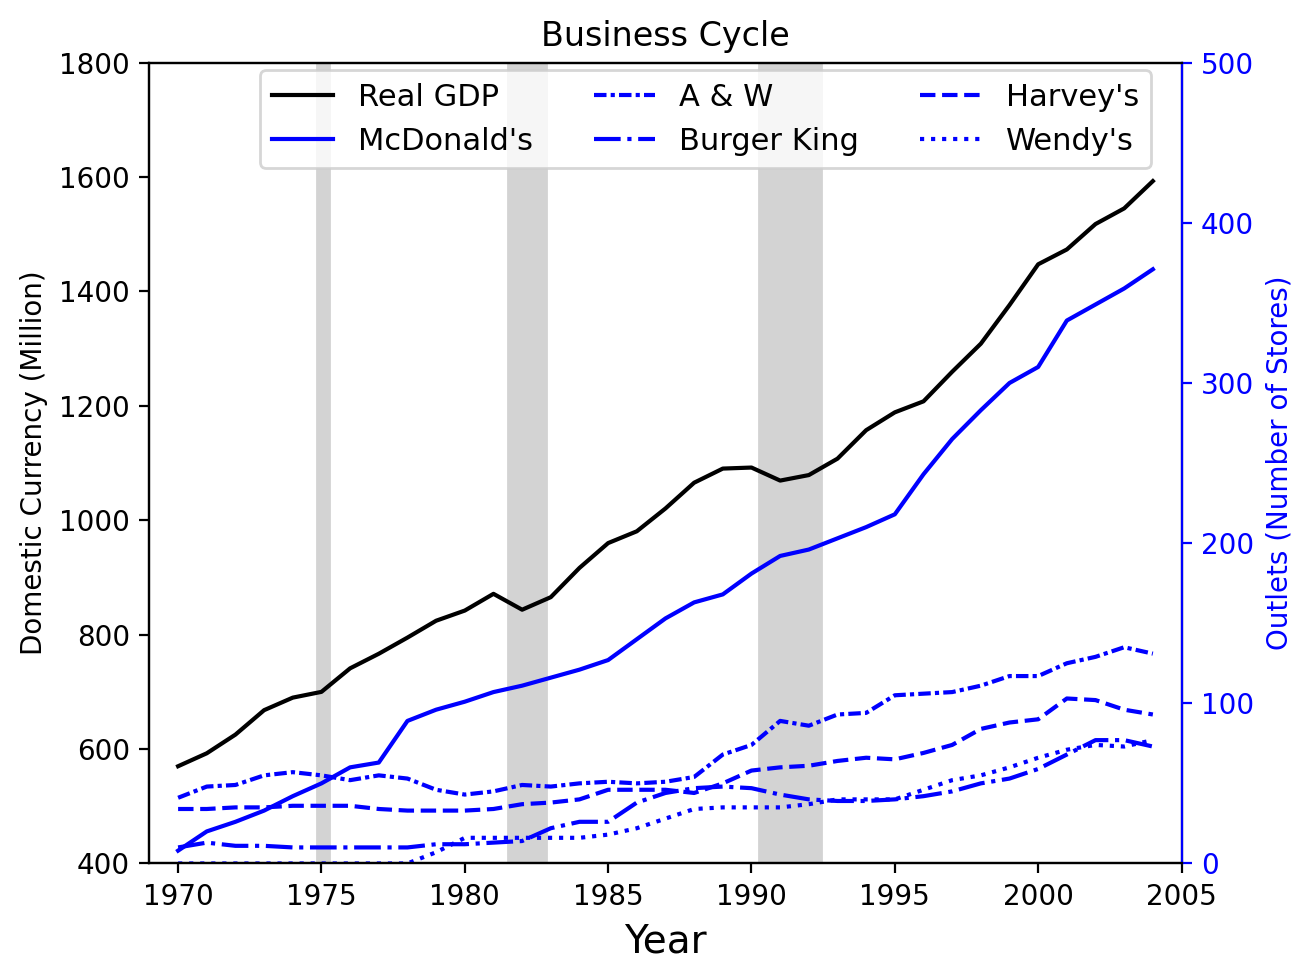

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

year = np.arange(35,dtype = int) +1970
yy_gdp = data_opr['RealGDP_wb'][0:TimePeriod]*1000
yy_aw = np.sum(N_aw.reshape([SamplePath, TimePeriod]),axis=0)
yy_bk = np.sum(N_bk.reshape([SamplePath, TimePeriod]),axis=0)
yy_hvy = np.sum(N_hvy.reshape([SamplePath, TimePeriod]),axis=0)
yy_mcd = np.sum(N_mcd.reshape([SamplePath, TimePeriod]),axis=0)
yy_wdy = np.sum(N_wdy.reshape([SamplePath, TimePeriod]),axis=0)

xx1a = 1974 + 10/12
xx1b = 1975 + 3/12
xx2a = 1981 + 6/12
xx2b = 1982 + 10/12
xx3a = 1990 + 3/12
xx3b = 1992 + 5/12
# yy = np.linspace(400,1800)
figure=plt.figure(figsize=(8/6*5,5),dpi=200)#(figsize=(12,4),dpi=100)
ax=figure.add_subplot(1, 1, 1)
ax.plot(year, yy_gdp, '-',label = r'Real GDP',color ='black')
ax.tick_params('y',colors='black')#'r')
ax.spines['left'].set_color('black')#('r') 
ax.set_ylim(400,1800)
ax.set_ylabel(r'Domestic Currency (Million)')
ax.yaxis.label.set_color('black')#('r')

ax1 = ax.twinx()
ax1.plot(year, yy_mcd, 'b-',label ='McDonald\'s' )
ax1.plot(year, yy_aw, color = 'b',label ='A & W',linestyle = (0, (3,1,1,1)) )
ax1.plot(year, yy_bk, 'b-.',label = 'Burger King' )
ax1.plot(year, yy_hvy, 'b--',label ='Harvey\'s' )
ax1.plot(year, yy_wdy, 'b:',label ='Wendy\'s' )

ax1.tick_params('y',colors='b')
ax1.spines['left'].set_color('black')#('r') 
ax1.spines['right'].set_color('b') 
ax1.set_ylim(0,500)
ax1.set_ylabel(r'Outlets (Number of Stores)')
ax1.yaxis.label.set_color('b')

ax.grid(False, axis='both')
ax.set_title(r'Business Cycle')

ax.set_xlim(1969,2005)
ax.set_xlabel(r'Year',fontsize =14)

# ax.fill(,xx1b)
ax.fill_between(np.linspace(xx1a,xx1b,100), 1800*np.ones(100), 0,color = 'lightgrey')
ax.fill_between(np.linspace(xx2a,xx2b,100), 1800*np.ones(100), 0,color = 'lightgrey')
ax.fill_between(np.linspace(xx3a,xx3b,100), 1800*np.ones(100), 0,color = 'lightgrey')

figure.legend(bbox_to_anchor=(0.875, 0.925),ncol=3,fontsize=11)
figure.tight_layout()
figure.show()


# plt.plot(year,yy_gdp,color='orange')
# # plt.plot(year,yy_aw,'--')
# plt.show()

### Continuous version (GDP + Inflation)

In [17]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','Income','PropertyValue','InflationRate',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -950.69
Model:                   OrderedModel   AIC:                             1919.
Method:            Maximum Likelihood   BIC:                             1992.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:14:39                                         
No. Observations:               23275                                         
Df Residuals:                   23266                                         
Df Model:                           9                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.4002      0.207    -11.617      0.000      -2.805      -1.995
Rival   

###continuous version (GDP)

####'Own','Rival','Population','Income','PropertyValue','RealGDP_wb'

In [18]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','Income','PropertyValue',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -951.24
Model:                   OrderedModel   AIC:                             1918.
Method:            Maximum Likelihood   BIC:                             1983.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:15:05                                         
No. Observations:               23275                                         
Df Residuals:                   23267                                         
Df Model:                           8                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.4039      0.207    -11.587      0.000      -2.811      -1.997
Rival   

####'Own','Rival','Population','Income','RealGDP_wb'

In [19]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','Income',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -953.03
Model:                   OrderedModel   AIC:                             1920.
Method:            Maximum Likelihood   BIC:                             1976.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:15:23                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3891      0.205    -11.638      0.000      -2.791      -1.987
Rival   

####'Own','Rival','Population','PropertyValue','RealGDP_wb'

In [20]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','PropertyValue',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -951.24
Model:                   OrderedModel   AIC:                             1916.
Method:            Maximum Likelihood   BIC:                             1973.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:15:39                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.4037      0.207    -11.587      0.000      -2.810      -1.997
Rival   

####'Own','Rival','Income','PropertyValue','RealGDP_wb'

In [21]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Income','PropertyValue',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -963.07
Model:                   OrderedModel   AIC:                             1940.
Method:            Maximum Likelihood   BIC:                             1997.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:15:58                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3171      0.196    -11.846      0.000      -2.700      -1.934
Rival   

####'Own','Rival','Population','RealGDP_wb'

In [22]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -953.75
Model:                   OrderedModel   AIC:                             1919.
Method:            Maximum Likelihood   BIC:                             1968.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:16:13                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3867      0.205    -11.659      0.000      -2.788      -1.985
Rival   

####'Own','Rival','Income','RealGDP_wb'

In [23]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Income',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -964.65
Model:                   OrderedModel   AIC:                             1941.
Method:            Maximum Likelihood   BIC:                             1990.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:16:28                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3055      0.194    -11.880      0.000      -2.686      -1.925
Rival   

####'Own','Rival','PropertyValue','RealGDP_wb'

In [24]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','PropertyValue',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -963.22
Model:                   OrderedModel   AIC:                             1938.
Method:            Maximum Likelihood   BIC:                             1987.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:16:41                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3150      0.195    -11.847      0.000      -2.698      -1.932
Rival   

####'Own','Rival','RealGDP_wb'

In [25]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival',#'Population','Income','PropertyValue',
                'RealGDP_wb']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -964.83
Model:                   OrderedModel   AIC:                             1940.
Method:            Maximum Likelihood   BIC:                             1980.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:16:53                                         
No. Observations:               23275                                         
Df Residuals:                   23270                                         
Df Model:                           5                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2969      0.192    -11.966      0.000      -2.673      -1.921
Rival   

###continuous version (Inflation Rate)

####'Own','Rival','Population','Income','PropertyValue','InflationRate'

In [26]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','Income','PropertyValue',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -960.53
Model:                   OrderedModel   AIC:                             1937.
Method:            Maximum Likelihood   BIC:                             2002.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:17:04                                         
No. Observations:               23275                                         
Df Residuals:                   23267                                         
Df Model:                           8                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3358      0.205    -11.381      0.000      -2.738      -1.934
Rival   

####'Own','Rival','Population','Income','InflationRate'

In [27]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','Income',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -963.77
Model:                   OrderedModel   AIC:                             1942.
Method:            Maximum Likelihood   BIC:                             1998.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:17:19                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3128      0.202    -11.430      0.000      -2.709      -1.916
Rival   

####'Own','Rival','Population','PropertyValue','InflationRate'

In [28]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population','PropertyValue',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -961.06
Model:                   OrderedModel   AIC:                             1936.
Method:            Maximum Likelihood   BIC:                             1993.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:17:33                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.3367      0.205    -11.379      0.000      -2.739      -1.934
Rival   

####'Own','Rival','Income','PropertyValue','InflationRate'

In [29]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Income','PropertyValue',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -979.49
Model:                   OrderedModel   AIC:                             1973.
Method:            Maximum Likelihood   BIC:                             2029.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:17:51                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2201      0.191    -11.633      0.000      -2.594      -1.846
Rival   

####'Own','Rival','Population','InflationRate'

In [30]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Population',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -969.37
Model:                   OrderedModel   AIC:                             1951.
Method:            Maximum Likelihood   BIC:                             1999.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:18:03                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2890      0.200    -11.432      0.000      -2.681      -1.897
Rival   

####'Own','Rival','Income','InflationRate'

In [31]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','Income',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -982.82
Model:                   OrderedModel   AIC:                             1978.
Method:            Maximum Likelihood   BIC:                             2026.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:18:14                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2010      0.189    -11.657      0.000      -2.571      -1.831
Rival   

####'Own','Rival','PropertyValue','InflationRate'

In [32]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival','PropertyValue',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])

  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -979.64
Model:                   OrderedModel   AIC:                             1971.
Method:            Maximum Likelihood   BIC:                             2020.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:18:25                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2218      0.191    -11.634      0.000      -2.596      -1.848
Rival   

####'Own','Rival','InflationRate'

In [33]:
res_inf_with = []
#mk=0
#if mk==0:
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr[['Own','Rival',#'Population','Income','PropertyValue',
                'InflationRate']][data_opr['MarketType']==mk+1]
  y = data_opr['Action'][data_opr['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

for j in range(len(res_prob.params  )):
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -986.99
Model:                   OrderedModel   AIC:                             1984.
Method:            Maximum Likelihood   BIC:                             2024.
Date:                Sat, 12 Nov 2022                                         
Time:                        16:18:35                                         
No. Observations:               23275                                         
Df Residuals:                   23270                                         
Df Model:                           5                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.1895      0.188    -11.638      0.000      -2.558      -1.821
Rival   

##orer probit

In [ ]:
data_opr_dist = pd.DataFrame(data=[],columns=['Action','Own','Rival','Population','Income','PropertyValue','RealGDP_wb','InflationRate','MarketType'])
data_opr_dist['Action'] = ai_label
data_opr_dist['Action'] = data_opr_dist['Action'].astype(action_type)
data_opr_dist['Own'] = np.hstack([Ni_aw,Ni_bk,Ni_hvy,Ni_mcd,Ni_wdy])
data_opr_dist['Rival'] =np.hstack([Nj_aw,Nj_bk,Nj_hvy,Nj_mcd,Nj_wdy])#Nj_mcd#
data_opr_dist['Population'] = np.hstack([disc_pop,disc_pop,disc_pop,disc_pop,disc_pop])#/1000#disc_pop#
data_opr_dist['Income'] = np.hstack([disc_inc,disc_inc,disc_inc,disc_inc,disc_inc])#/1000#disc_inc#
data_opr_dist['PropertyValue'] = np.hstack([disc_val,disc_val,disc_val,disc_val,disc_val])#/1000#disc_val#
data_opr_dist['DistGDP'] = np.hstack([disc_gdp,disc_gdp,disc_gdp,disc_gdp,disc_gdp])#/1000000#disc_gdp#
data_opr_dist['DistInflation'] = np.hstack([disc_infr,disc_infr,disc_infr,disc_infr,disc_infr])#disc_infr#
data_opr_dist['MarketType'] = np.hstack([tertile,tertile,tertile,tertile,tertile])

In [ ]:
res_inf_with = []
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','Population','Income','PropertyValue','DistInflation']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)


#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -965.46
Model:                   OrderedModel   AIC:                             1947.
Method:            Maximum Likelihood   BIC:                             2011.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:33:34                                         
No. Observations:               23275                                         
Df Residuals:                   23267                                         
Df Model:                           8                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2757      0.199    -11.409      0.000      -2.667      -1.885
Rival   

In [ ]:
#res_prob.bse #std err
#res_prob.pvalues #p>|Z|
#res_prob.prsquared #R^2
#res_prob.tvalues #z
#res_prob.params #coef

for j in range(len(res_prob.params  )):
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

-2.2757***&-0.9599***&-0.2544***\\
***&
***&
***&
\\
&(0.1995)&(0.0733)&(0.0304)\\\hline
-0.4939***&-0.3592***&-0.0927***\\
***&
***&
***&
\\
&(0.0814)&(0.0407)&(0.0183)\\\hline
0.1171***&0.0720***&0.0189***\\
***&
***&
&
\\
&(0.0294)&(0.0206)&(0.0162)\\\hline
0.0383***&0.0988***&0.0413***\\
&
***&
**&
\\
&(0.0303)&(0.0227)&(0.0171)\\\hline
0.1110***&0.0763***&0.0392***\\
***&
***&
**&
\\
&(0.0320)&(0.0231)&(0.0167)\\\hline
0.3250***&0.2565***&0.0869***\\
***&
***&
**&
\\
&(0.0670)&(0.0511)&(0.0391)\\\hline
-3.5020***&-2.9556***&-2.7104***\\
***&
***&
***&
\\
&(0.1964)&(0.0738)&(0.0500)\\\hline
1.8912***&1.7144***&1.5556***\\
***&
***&
***&
\\
&(0.0304)&(0.0132)&(0.0088)\\\hline
0.1750&0.0752&0.0163\\


In [ ]:
res_inf_with = []

for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','PropertyValue','DistInflation']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)



#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -975.29
Model:                   OrderedModel   AIC:                             1963.
Method:            Maximum Likelihood   BIC:                             2011.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:34:00                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2282      0.192    -11.604      0.000      -2.605      -1.852
Rival   

In [ ]:
#res_prob.bse #std err
#res_prob.pvalues #p>|Z|
#res_prob.prsquared #R^2
#res_prob.tvalues #z
#res_prob.params #coef

for j in range(len(res_prob.params  )):
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

-2.2282***&-0.8958***&-0.2457***\\
***&
***&
***&
\\
&(0.1920)&(0.0716)&(0.0302)\\\hline
-0.4642***&-0.2995***&-0.0813***\\
***&
***&
***&
\\
&(0.0813)&(0.0389)&(0.0178)\\\hline
0.1333***&0.1014***&0.0495***\\
***&
***&
***&
\\
&(0.0294)&(0.0219)&(0.0158)\\\hline
0.3918***&0.3115***&0.1026***\\
***&
***&
***&
\\
&(0.0646)&(0.0496)&(0.0385)\\\hline
-3.6496***&-3.0610***&-2.7488***\\
***&
***&
***&
\\
&(0.1868)&(0.0714)&(0.0471)\\\hline
1.8793***&1.7059***&1.5546***\\
***&
***&
***&
\\
&(0.0293)&(0.0129)&(0.0088)\\\hline
0.1666&0.0659&0.0151\\


##orer logit

In [ ]:
for mk in range(3):
  print('#############')
  print(mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','Population','Income','PropertyValue','DistInflation']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='logit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)

#############
1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -974.31
Model:                   OrderedModel   AIC:                             1965.
Method:            Maximum Likelihood   BIC:                             2029.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:34:18                                         
No. Observations:               23275                                         
Df Residuals:                   23267                                         
Df Model:                           8                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -5.7497      0.479    -12.006      0.000      -6.688      -4.811
Rival              -1

In [ ]:
for mk in range(3):
  print('#############')
  print(mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','PropertyValue','DistInflation']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='logit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)

#############
1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -982.66
Model:                   OrderedModel   AIC:                             1977.
Method:            Maximum Likelihood   BIC:                             2026.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:34:39                                         
No. Observations:               23275                                         
Df Residuals:                   23269                                         
Df Model:                           6                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -5.7197      0.474    -12.072      0.000      -6.648      -4.791
Rival              -1

# Ordered Probit Regression (GDP Growth Rate)

In [ ]:
# import statsmodels
# statsmodels.__version__

In [ ]:
# pip install --upgrade --no-deps statsmodels

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
#from statsmodels.discrete.discrete_model import OrderedModel
from pandas.api.types import CategoricalDtype

In [ ]:
action_type = CategoricalDtype(categories=['exit', 'unchanged', 'enter'], ordered=True)
ai = np.hstack([ai_aw,ai_bk,ai_hvy,ai_mcd,ai_wdy])
ai_label=[]
for i in range(len(ai)):
  if ai[i] == 0:
    ai_label.append('exit')
  elif ai[i] ==1:
    ai_label.append('unchanged')
  else:
    ai_label.append('enter')
    
data_opr = pd.DataFrame(data=[],columns=['Action','Own','Rival','Population','Income','PropertyValue','RealGDP_wb','InflationRate','MarketType'])
data_opr['Action'] = ai_label
data_opr['Action'] = data_opr['Action'].astype(action_type)
data_opr['Own'] = np.hstack([N_aw,N_bk,N_hvy,N_mcd,N_wdy])
data_opr['Rival'] =np.hstack([N_mcd +N_hvy +N_bk + N_wdy,
                              N_aw +N_hvy +N_mcd + N_wdy,
                              N_aw +N_mcd +N_bk + N_wdy,
                              N_aw +N_hvy +N_bk + N_wdy,
                              N_aw +N_hvy +N_bk + N_mcd])#Nj_mcd#
data_opr['Population'] = np.hstack([pop,pop,pop,pop,pop])/1000#disc_pop#
data_opr['Income'] = np.hstack([inc,inc,inc,inc,inc])/1000#disc_inc#
data_opr['PropertyValue'] = np.hstack([val,val,val,val,val])/1000#disc_val#
real_gdp = np.kron(np.ones(SamplePath),data_extra['RealGDP_wb'][0:TimePeriod].to_numpy())
data_opr['RealGDP_wb'] = np.hstack([real_gdp,real_gdp,real_gdp,real_gdp,real_gdp])/1000000#disc_gdp#
real_inf = np.kron(np.ones(SamplePath),data_extra['InflationRate_wb'][0:TimePeriod].to_numpy())
data_opr['InflationRate'] = np.hstack([real_inf,real_inf,real_inf,real_inf,real_inf])#disc_infr#
data_opr['MarketType'] = np.hstack([tertile,tertile,tertile,tertile,tertile])

In [ ]:
data_opr_dist = pd.DataFrame(data=[],columns=['Action','Own','Rival','Population','Income','PropertyValue','RealGDP_wb','InflationRate','MarketType'])
data_opr_dist['Action'] = ai_label
data_opr_dist['Action'] = data_opr_dist['Action'].astype(action_type)
data_opr_dist['Own'] = np.hstack([Ni_aw,Ni_bk,Ni_hvy,Ni_mcd,Ni_wdy])
data_opr_dist['Rival'] =np.hstack([Nj_aw,Nj_bk,Nj_hvy,Nj_mcd,Nj_wdy])#Nj_mcd#
data_opr_dist['Population'] = np.hstack([disc_pop,disc_pop,disc_pop,disc_pop,disc_pop])#/1000#disc_pop#
data_opr_dist['Income'] = np.hstack([disc_inc,disc_inc,disc_inc,disc_inc,disc_inc])#/1000#disc_inc#
data_opr_dist['PropertyValue'] = np.hstack([disc_val,disc_val,disc_val,disc_val,disc_val])#/1000#disc_val#
data_opr_dist['DistGDP'] = np.hstack([disc_gdp,disc_gdp,disc_gdp,disc_gdp,disc_gdp])#/1000000#disc_gdp#
data_opr_dist['DistInflation'] = np.hstack([disc_infr,disc_infr,disc_infr,disc_infr,disc_infr])#disc_infr#
data_opr_dist['MarketType'] = np.hstack([tertile,tertile,tertile,tertile,tertile])

##orer probit

In [ ]:
res_inf_with = []
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','Population','Income','PropertyValue','DistGDP']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)

#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -975.70
Model:                   OrderedModel   AIC:                             1967.
Method:            Maximum Likelihood   BIC:                             2032.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:34:58                                         
No. Observations:               23275                                         
Df Residuals:                   23267                                         
Df Model:                           8                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.2195      0.200    -11.116      0.000      -2.611      -1.828
Rival   

In [ ]:
#res_prob.bse #std err
#res_prob.pvalues #p>|Z|
#res_prob.prsquared #R^2
#res_prob.tvalues #z
#res_prob.params #coef

for j in range(len(res_prob.params  )):
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

-2.2195***&-0.9168***&-0.2425***\\
***&
***&
***&
\\
&(0.1997)&(0.0722)&(0.0299)\\\hline
-0.4556***&-0.3208***&-0.0793***\\
***&
***&
***&
\\
&(0.0820)&(0.0399)&(0.0173)\\\hline
0.1426***&0.0842***&0.0231***\\
***&
***&
&
\\
&(0.0288)&(0.0205)&(0.0161)\\\hline
0.0638***&0.1179***&0.0450***\\
**&
***&
***&
\\
&(0.0295)&(0.0223)&(0.0169)\\\hline
0.1496***&0.0999***&0.0466***\\
***&
***&
***&
\\
&(0.0305)&(0.0225)&(0.0164)\\\hline
0.2149***&0.1932***&0.0355***\\
*&
**&
&
\\
&(0.1132)&(0.0845)&(0.0593)\\\hline
-3.2819***&-2.7780***&-2.6757***\\
***&
***&
***&
\\
&(0.2224)&(0.1039)&(0.0741)\\\hline
1.8856***&1.7092***&1.5549***\\
***&
***&
***&
\\
&(0.0305)&(0.0130)&(0.0088)\\\hline
0.1662&0.0693&0.0156\\


In [ ]:
res_inf_with = []
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','Income','PropertyValue','DistGDP']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)


#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -988.79
Model:                   OrderedModel   AIC:                             1992.
Method:            Maximum Likelihood   BIC:                             2048.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:35:32                                         
No. Observations:               23275                                         
Df Residuals:                   23268                                         
Df Model:                           7                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Own                -2.1574      0.192    -11.234      0.000      -2.534      -1.781
Rival   

In [ ]:
#res_prob.bse #std err
#res_prob.pvalues #p>|Z|
#res_prob.prsquared #R^2
#res_prob.tvalues #z
#res_prob.params #coef

for j in range(len(res_prob.params  )):
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

***&
***&
***&
\\
-2.1574***&-0.8887***&-0.2390***\\
&(0.1920)&(0.0715)&(0.0298)\\\hline
***&
***&
***&
\\
-0.4181***&-0.2949***&-0.0746***\\
&(0.0818)&(0.0391)&(0.0170)\\\hline
***&
***&
***&
\\
0.0818***&0.1204***&0.0472***\\
&(0.0285)&(0.0222)&(0.0169)\\\hline
***&
***&
***&
\\
0.1589***&0.1048***&0.0444***\\
&(0.0298)&(0.0222)&(0.0163)\\\hline
*&
**&
&
\\
0.2072***&0.1882***&0.0346***\\
&(0.1119)&(0.0841)&(0.0593)\\\hline
***&
***&
***&
\\
-3.4351***&-2.8478***&-2.6988***\\
&(0.2140)&(0.1027)&(0.0725)\\\hline
***&
***&
***&
\\
1.8713***&1.7046***&1.5547***\\
&(0.0294)&(0.0128)&(0.0088)\\\hline
0.1550&0.0643&0.0152\\


In [ ]:
res_inf_with = []
for mk in range(3):
  print('#############')
  print('market type:',mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
#  X = data_opr_dist[['Own','Rival','DistGDP']][data_opr_dist['MarketType']==mk+1]
  X = data_opr_dist[['PropertyValue','DistGDP']][data_opr_dist['MarketType']==mk+1]

  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='probit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)
  res_inf_with.append(res_prob)


#############
market type: 1
                             OrderedModel Results                             
Dep. Variable:                 Action   Log-Likelihood:                -1157.5
Model:                   OrderedModel   AIC:                             2323.
Method:            Maximum Likelihood   BIC:                             2355.
Date:                Tue, 18 Oct 2022                                         
Time:                        18:56:24                                         
No. Observations:               23275                                         
Df Residuals:                   23271                                         
Df Model:                           4                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PropertyValue       0.1145      0.024      4.767      0.000       0.067       0.162
DistGDP 

In [ ]:
#res_prob.bse #std err
#res_prob.pvalues #p>|Z|
#res_prob.prsquared #R^2
#res_prob.tvalues #z
#res_prob.params #coef

for j in range(len(res_prob.params  )):
  for i in range(3):
    if res_inf_with[i].pvalues[j] <=1/100:
      print('***&')
    elif res_inf_with[i].pvalues[j]<=5/100:
      print('**&')
    elif res_inf_with[i].pvalues[j]<=10/100:
      print('*&')
    else:
      print('&')
  print('\\\\')
  print('{:.4f}***&{:.4f}***&{:.4f}***\\\\'.format(res_inf_with[0].params[j],
                                          res_inf_with[1].params[j],
                                          res_inf_with[2].params[j]))

  #print(res_inf_with[0].pvalues[j],res_inf_with[1].pvalues[j],res_inf_with[2].pvalues[j])
  print('&({:.4f})&({:.4f})&({:.4f})\\\\\\hline'.format(res_inf_with[0].bse[j],
                                          res_inf_with[1].bse[j],
                                          res_inf_with[2].bse[j]))
print('{:.4f}&{:.4f}&{:.4f}\\\\'.format(res_inf_with[0].prsquared,res_inf_with[1].prsquared,res_inf_with[2].prsquared))

***&
***&
*&
\\
0.1145***&0.0552***&0.0269***\\
&(0.0240)&(0.0192)&(0.0146)\\\hline
&
*&
&
\\
0.1425***&0.1474***&0.0387***\\
&(0.0944)&(0.0798)&(0.0588)\\\hline
***&
***&
***&
\\
-2.5736***&-2.6144***&-2.5547***\\
&(0.1007)&(0.0873)&(0.0667)\\\hline
***&
***&
***&
\\
1.6928***&1.6422***&1.5397***\\
&(0.0105)&(0.0097)&(0.0083)\\\hline
0.0109&0.0034&0.0006\\


##orer logit

In [ ]:
for mk in range(3):
  print('#############')
  print(mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','Population','Income','PropertyValue','DistGDP']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='logit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)

#############
1


KeyboardInterrupt: ignored

In [ ]:
for mk in range(3):
  print('#############')
  print(mk+1)
  # X = data_opr[['Own','Rival','Population','Income','PropertyValue','RealGDP_wb']][data_opr['MarketType']==mk+1]
  # y = data_opr['Action'][data_opr['MarketType']==mk+1]
  # mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
  #                         distr='probit')
  # res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  # print(res_prob.summary())
  X = data_opr_dist[['Own','Rival','Income','PropertyValue','DistGDP']][data_opr_dist['MarketType']==mk+1]
  y = data_opr_dist['Action'][data_opr_dist['MarketType']==mk+1]
  mod_prob = OrderedModel(y,X,#,disc_infr_other],axis=1),
                          distr='logit')
  res_prob = mod_prob.fit(method='bfgs',disp=False)#(method='minimize')
  print(res_prob.summary())
  print(res_prob.prsquared)